In [32]:
import pandas as pd

# Local file path (if the CSV is already on your system)
f = pd.read_csv("D:\\Mall Customer Segmentation Data\\Mall_Customers.csv")

# For files in your current working directory
df = pd.read_csv("D:\\Mall Customer Segmentation Data\\Mall_Customers.csv")


# Display the first few rows to verify
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [33]:
# General overview
print("Shape of the dataset:", df.shape)
print("\nColumn names:", df.columns)

# Detailed info
df.info()
df.describe()

Shape of the dataset: (200, 5)

Column names: Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


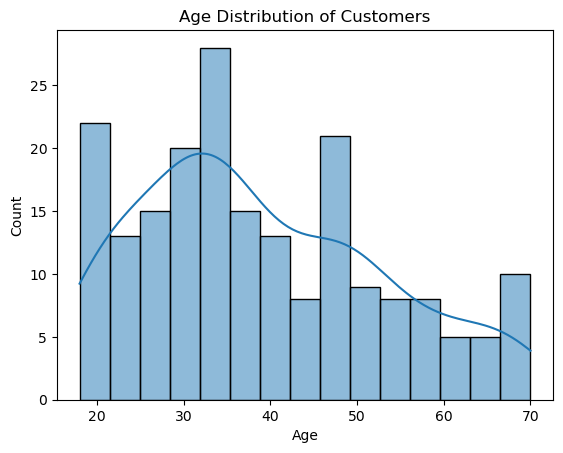

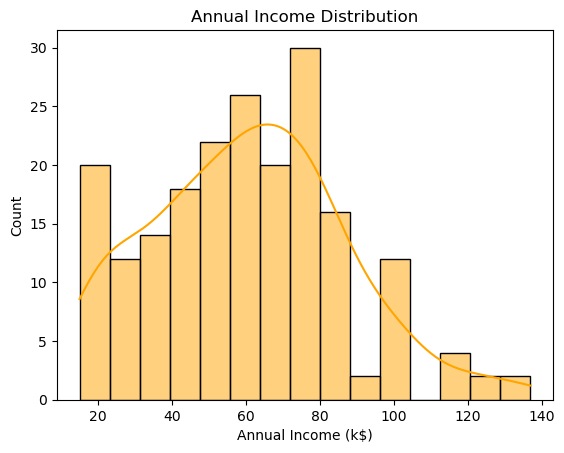

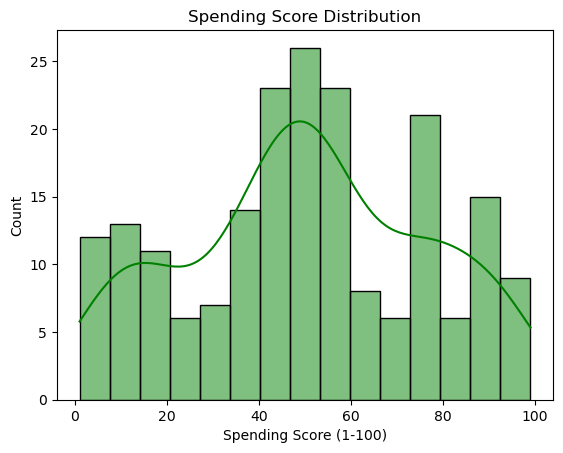

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt

# Age distribution
sns.histplot(df['Age'], kde=True, bins=15)
plt.title("Age Distribution of Customers")
plt.show()

# Annual Income distribution
sns.histplot(df['Annual Income (k$)'], kde=True, bins=15, color='orange')
plt.title("Annual Income Distribution")
plt.show()

# Spending Score distribution
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=15, color='green')
plt.title("Spending Score Distribution")
plt.show()

In [35]:
# We'll use Age, Income, and Spending Score
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [37]:
from sklearn.cluster import KMeans

# Try clustering into 5 groups
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)

# Attach cluster labels to the original data
df['Cluster'] = kmeans.labels_
df.head()

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,3
3,4,Female,23,16,77,2
4,5,Female,31,17,40,2


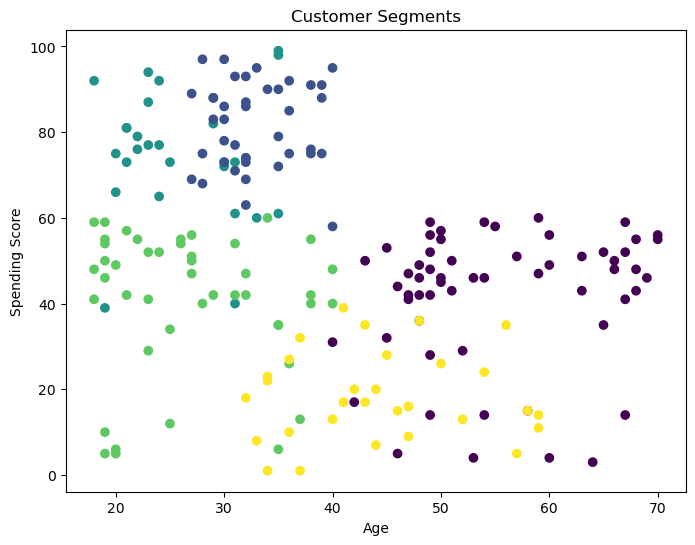

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(X['Age'], X['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis')
plt.xlabel("Age")
plt.ylabel("Spending Score")
plt.title("Customer Segments")
plt.show()

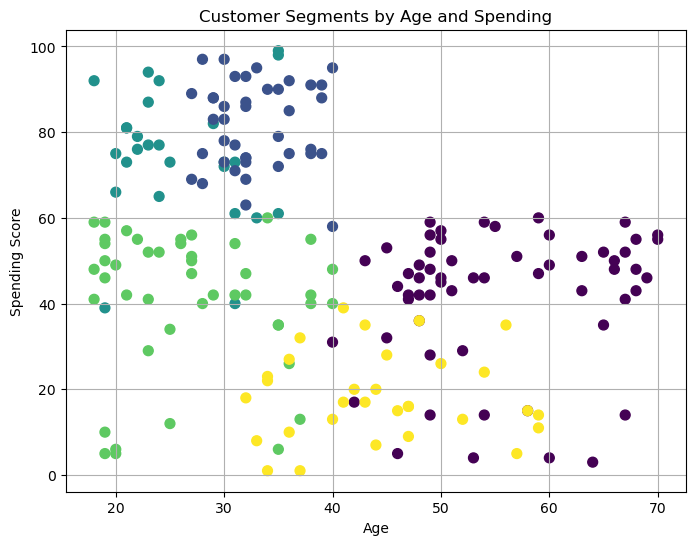

In [39]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Age'], df['Spending Score (1-100)'], c=df['Cluster'], cmap='viridis', s=50)
plt.xlabel('Age')
plt.ylabel('Spending Score')
plt.title('Customer Segments by Age and Spending')
plt.grid(True)
plt.show()

In [40]:
# Group by cluster and get mean values
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
cluster_summary

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,68.775862,55.275862,47.620690,41.706897
1,161.025000,32.875000,86.100000,81.525000
2,23.461538,25.769231,26.115385,74.846154
3,86.377778,26.733333,54.311111,40.911111
4,166.870968,44.387097,89.774194,18.483871


In [57]:
# Save to new CSV file
df.to_csv("Mall_Customers_with_Cluster.csv", index=False)

In [59]:
import os

# See all files in your working directory
print(os.listdir())

['.anaconda', '.angular-config.json', '.bash_history', '.conda', '.condarc', '.continuum', '.gitconfig', '.ipynb_checkpoints', '.ipython', '.jupyter', '.matplotlib', '.redhat', '.spyder-py3', '.streamlit', '.vscode', 'anaconda3', 'anaconda_projects', 'ansel', 'AppData', 'Application Data', 'Contacts', 'Cookies', 'Documents', 'Downloads', 'Dropbox', 'Favorites', 'HelloWorld.java', 'jcef_20796.log', 'jcef_2728.log', 'Links', 'Local Settings', 'Mall Customer Segmentation Data.zip', 'Mall_Customers.csv', 'Mall_Customers_with_Cluster.csv', 'Music', 'My Documents', 'my-angular-app', 'my-node-project', 'NetHood', 'node_modules', 'NTUSER.DAT', 'ntuser.dat.LOG1', 'ntuser.dat.LOG2', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TM.blf', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000001.regtrans-ms', 'NTUSER.DAT{2ad838bc-efea-11ee-a54d-000d3a94eaa1}.TMContainer00000000000000000002.regtrans-ms', 'ntuser.ini', 'OneDrive', 'package-lock.json', 'package.json', 'Pos